<font size="+3">Анализ бизнес-показателей приложения "Procrastinate Pro+"</font>


Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

# Описание задания

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

# Загрузка и предобработка данных 

## Загрузка таблиц и библиотек

Загрузим необходимые библиотеки для работы с данными, и присвоим таблицы переменным функцией `read_csv`

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import numpy as np

In [2]:
data_visits = pd.read_csv('C:/Users/Georgii/Desktop/ANALYTICS/visits_info_short.csv')
data_orders = pd.read_csv('C:/Users/Georgii/Desktop/ANALYTICS/orders_info_short.csv')
data_costs = pd.read_csv('C:/Users/Georgii/Desktop/ANALYTICS/costs_info_short.csv')

Изучим сохраненные данные. Выведем основную информацию по таблицам.

In [3]:
all_data = [data_visits, data_orders, data_costs] # Датафреймы, по которым проходится цикл
for element in all_data:
    display (element.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
for element in all_data:
    display (element.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Построим гистограммы для всех возможных столбцов датафреймов.

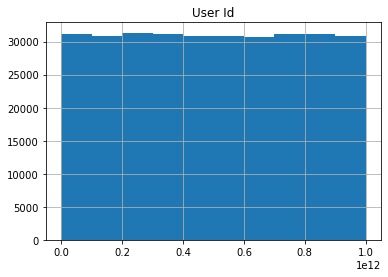

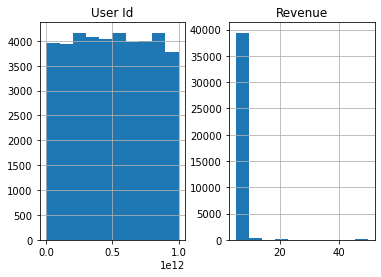

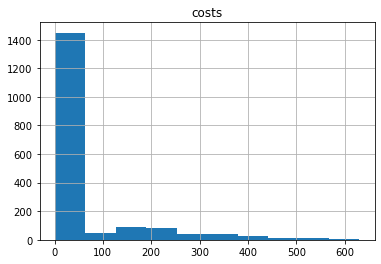

In [5]:
for element in all_data:
    element.hist();

***Вывод: Данные выглядят корректно. Необходимо выполнить их предобработку, привести определенные данные к нужному типу.***

## Предобработка данных

Проверим наличие пропусков в датафреймах, продолжая использовать список таблиц `all_data` для перебора таблиц в цикле.

In [6]:
for element in all_data:
    print (element.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
User Id     0
Event Dt    0
Revenue     0
dtype: int64
dt         0
Channel    0
costs      0
dtype: int64


Теперь проверим наличие дубликатов.

In [7]:
for element in all_data:
    print (element.duplicated().sum())

0
0
0


Приведем названия столбцов к змеиному регистру.

In [8]:
data_visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
data_orders.columns = ['user_id', 'event_dt', 'revenue']
data_costs.columns = ['dt', 'channel', 'costs']

Поменяем типы данных в столбцах `session_start`, `session_end`, `event_dt`, `dt`, чтобы иметь возможность проводить расчеты с датами.

In [9]:
data_visits['session_start'] = pd.to_datetime(data_visits['session_start'])
data_visits['session_end'] = pd.to_datetime(data_visits['session_end'])
data_orders['event_dt'] = pd.to_datetime(data_orders['event_dt'])
data_costs['dt'] = pd.to_datetime(data_costs['dt']).dt.date

***Вывод: Предобработка проведена. Изменены названия столбцов. Изменены типы данных в столбцах с датами.***

# Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии.

**Создадим функцию для получения профайлов**

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**Создадим функцию для получение LTV, ROI и CAC**

In [11]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция фильтрации**

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция для построения графиков LTV, ROI и CAC**

In [13]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для расчета удержания**

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для визуализации удержания**

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для расчета конверсии**

In [16]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для визуализации конверсии**

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

***Все необходимые функции написаны, можно приступать к исследовательскому анализу данных.***

# Исследовательский анализ данных

Составим профили пользователей, используя написанную функцию.

In [18]:
profiles = get_profiles(data_visits, data_orders, data_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей

In [19]:
min_data = profiles['dt'].min()
max_data = profiles['dt'].max()
print (min_data, max_data)

2019-05-01 2019-10-27


*Профили сформированы. Минимальная дата привлечения пользователей - `2019-05-01`, максимальная - `2019-10-27`.*

Изучим регионы, устройства и рекламные источники привлечения платящих пользователей. Напишем цикл, который выведет таблицы с общим количеством пользователей и долей платящих пользователей, разбивая всех пользователей на когорты по вышеперечисленным признакам.

In [20]:
parameters = ['region', 'device', 'channel'] # список признаков для агрегирования данных
names = ['Страна', 'Устройство', 'Канал привлечения'] # список признаков для описания таблиц
for parameter, name in zip(parameters, names):
    # Считаем общее кол-во пользователей и кол-во платящих
    profiles_par = profiles.groupby(parameter).agg({'user_id':'count', 'payer':'sum'}) 
    # Считаем долю платящих
    profiles_par['payer_ratio'] = (profiles_par['payer'] / profiles_par['user_id'] * 100)
    profiles_par.columns = [
        'Кол-во пользователей', 'Кол-во платящих пользователей', 'Процент платящих пользователей'
    ]
    # Присвиваем индексу название признака 
    profiles_par.index.name = name
    profiles_par_sorted = profiles_par.sort_values(by='Процент платящих пользователей', ascending=False)
    # Переводим в проценты
    profiles_par_sorted['Процент платящих пользователей'] = profiles_par['Процент платящих пользователей']\
    .map('{:,.2f}%'.format)
    print  (f'Привлеченные пользователи. Признак - {name}')
    display (profiles_par_sorted)
    print ('')
    

Привлеченные пользователи. Признак - Страна


,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих пользователей
Страна,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%



Привлеченные пользователи. Признак - Устройство


,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих пользователей
Устройство,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%



Привлеченные пользователи. Признак - Канал привлечения


,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих пользователей
Канал привлечения,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


**Вывод:**
- ***По стране: наибольшее количество пользователей с существенным перевесом переходят с США. Доля платящих также больше в США, причем существенно. Наименее активно платят пользователи из Франции***
- ***По устройству: пользователи чаще всего заходят в приложения с устройств Iphone, и при этом имеют наибольшую конверсию в платящих клиентов, не считая владельцев Mac, которых меньше по количеству, но доля платящих чуть больше чем у Iphone. Наименьшая доля платящих пользователей у устройств типа PC***
- ***По рекламной сети: самое большое количество пользователей приходят с органики, однако доля платящих среди них ниже чем у любой рекламной сети, что вполне естественно. Достаточно большое количество пользователей пришли с рекламных сетей `Faceboom` и `TipTop`, с процентом платящих 12.20% и 9.60% соответственно. У `FaceBoom` самый высокий процент платящих клиентов. Хуже всего конверсится рекламная сеть `OppleCreativeMedia`.***

# Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [21]:
cost_total = round(data_costs['costs'].sum())
print (f'Общая сумма расходов на маркетинг - {cost_total} $')

Общая сумма расходов на маркетинг - 105497 $


Выясним, как траты распределены по рекламным источникам.

In [22]:
expenses = data_costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
expenses = expenses.to_frame()
expenses['costs_rate'] = expenses['costs'] / (expenses['costs'].sum())
expenses['costs_rate'] = expenses['costs_rate'].map('{:,.2f}%'.format)
expenses

,costs,costs_rate
channel,,
TipTop,54751.30,0.52%
FaceBoom,32445.60,0.31%
WahooNetBanner,5151.00,0.05%
AdNonSense,3911.25,0.04%
OppleCreativeMedia,2151.25,0.02%
RocketSuperAds,1833.00,0.02%
LeapBob,1797.60,0.02%
lambdaMediaAds,1557.60,0.01%
MediaTornado,954.48,0.01%


*Наиболее активно рекламные средства тратились на 'TipTop' и 'FaceBoom'. Теперь необходимо определить насколько рационально были эти рекламные средства распределены.*

In [23]:
cac_per_person = (
    profiles
    .query('channel != "organic"')
    .groupby('channel')['acquisition_cost']
    .mean()
    .sort_values(ascending=False)
      )

In [24]:
cac_per_person

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

In [25]:
cac_per_person_overall = profiles.query('channel != "organic"')['acquisition_cost'].mean()
cac_per_person_overall

1.127481323942928

*Самая высокая средняя стоимость привлечения пользователя приходится на 'TipTop'. `Она сильно выше чем средний CAC на одного пользователя`. Наименьше всего стоят пользователи по каналам 'LeapBob', 'MediaTornado' и 'YRabbit'. Однако нельзя с полной увереннностью говорить об эффективности этих площадок, возможно привлеченные оттуда пользователи не конвертируются в платящих.*

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

<Figure size 1152x360 with 0 Axes>

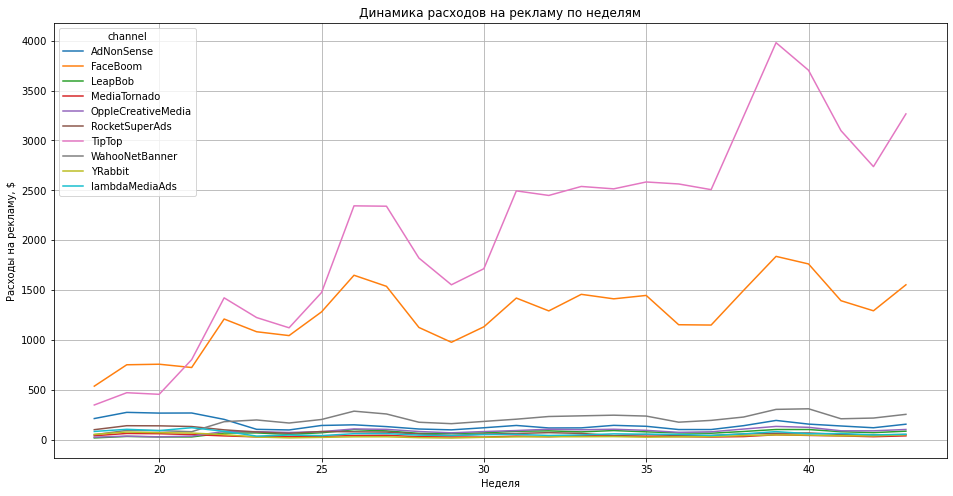

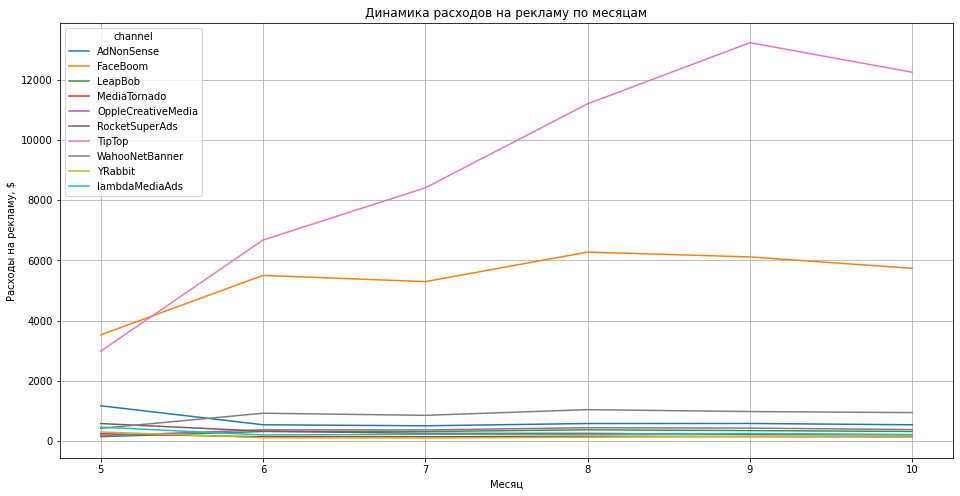

In [26]:
data_costs['week'] = pd.to_datetime(data_costs['dt']).dt.isocalendar().week
data_costs['month'] = pd.DatetimeIndex(data_costs['dt']).month
sdd = data_costs.pivot_table(index=['week'], columns = 'channel', values='costs', aggfunc='sum')
sdt = data_costs.pivot_table(index=['month'], columns = 'channel', values='costs', aggfunc='sum')
plt.figure(figsize = (16,5))
sdd.plot(grid=True, figsize = (16,8))
plt.xlabel("Неделя")
plt.ylabel("Расходы на рекламу, $")
plt.title("Динамика расходов на рекламу по неделям")
sdt.plot(grid=True, figsize = (16,8))
plt.title("Динамика расходов на рекламу по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Расходы на рекламу, $")
plt.show();

*Основные объемы по закупке рекламы приходятся на источники 'TipTop' и 'FaceBoom'. По полученным графиком заметно, что примерно через месяц после рассматриваемого отрезка времени в 'TipTop' начали поступать бóльшие рекламные средства чем в 'FaceBoom'. У остальных рекламных сетей динамика поступления средств достаточно стабильная.*

***Выводы: по проведеннному исследовательскому анализу было определено, что основные траты на рекламу идут источники 'TipTop' и 'FaceBoom'.***

***Можно предположить, что средства на рекламу возможно были распределены не лучшим образом. Большие затраты на 'TipTop' кажутся не такими оптимальнымы, ввиду большей стоимости привлечения клиентов по сравнению с 'FaceBoom', а также с меньшей конверсией в платящих пользователей. Возможно, повышение инвестирования рекламы 'TipTop' с начала второго месяца было ошибочным, если рекламная компания не имела целей повышения узнаваемости бренда конкретно на этой платформе.***

***Наиболее выигрышным на данный момент выглядит стратегия привлечения бо́льших средств в 'FaceBoom', в качестве самой эффективной площадки.
Также, особое у этих платформ достаточно хорошие показатели.***

# Оценка окупаемости рекламы 

## Расчет основных бизнес показателей

Зададим рассматриваемую дату и необходимый период оккупаемости. Также уберем из выборки пользователей, которые пришли органическим путем.

In [27]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа
profiles = profiles.query('channel != "organic"')# фильтр

In [28]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, horizon_days)

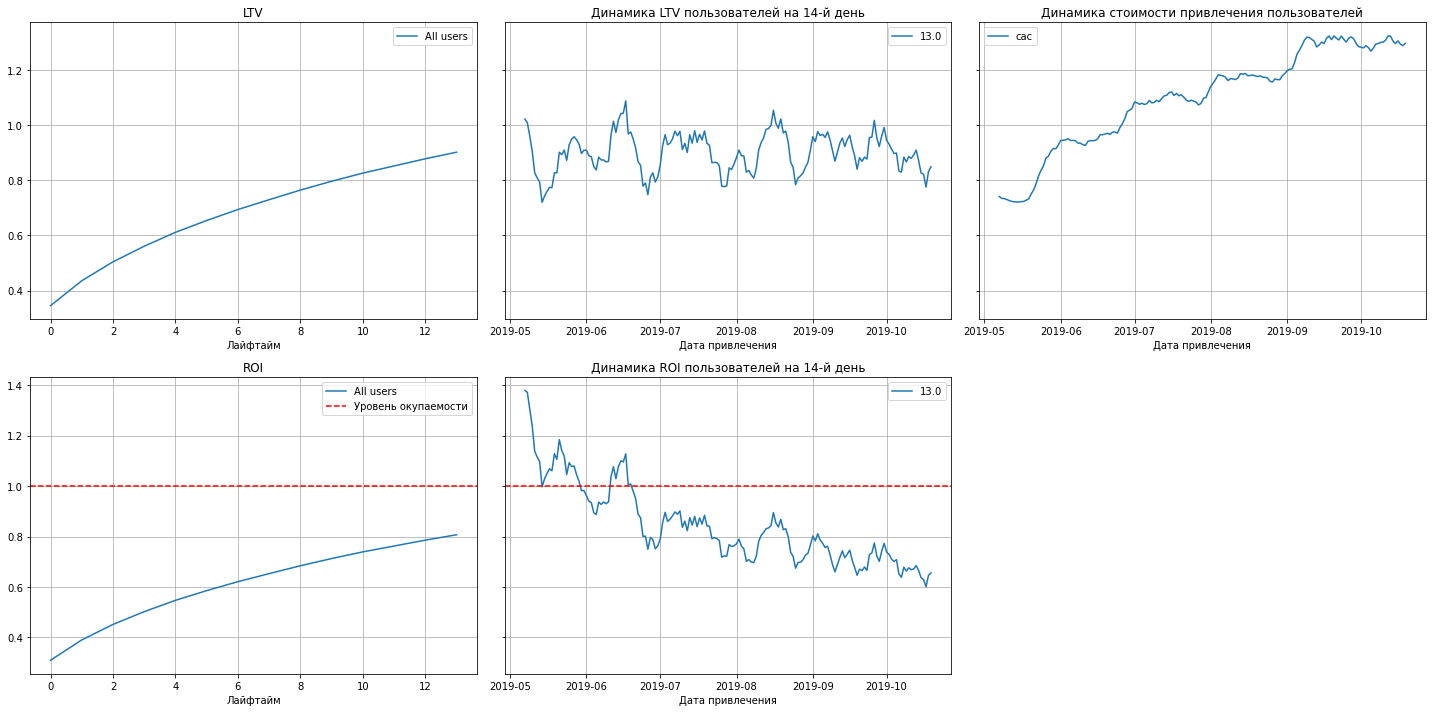

In [29]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

*По графикам можно сделать такие выводы:*
- *Реклама не окупается. ROI в конце горизонта анализа доходит только до 80%.*


- *CAC нестабилен. Наблюдается резкое увеличение расходов на рекламы с середины мая, причем динамика LTV остается примерно такой же*


- *Динамика ROI резко идет на спад с середины месяца мая, что совпадает с увеличением CAC*

*Нужно разобраться в причинах неокупаемости рекламы. Для этого посчитаем LTV, ROI и CAC по отдельным признакам - устройству, стране и каналу привлечения.*

## Расчет LTV, ROI и CAC по устройству

Посчитаем LTV, ROI и CAC по устройству, используя написанные ранее функции `get_ltv` и `plot_ltv_roi`

In [30]:
dimensions = ['device']

In [31]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, 
                                                                               horizon_days,
                                                                               dimensions=dimensions
                                                                              )

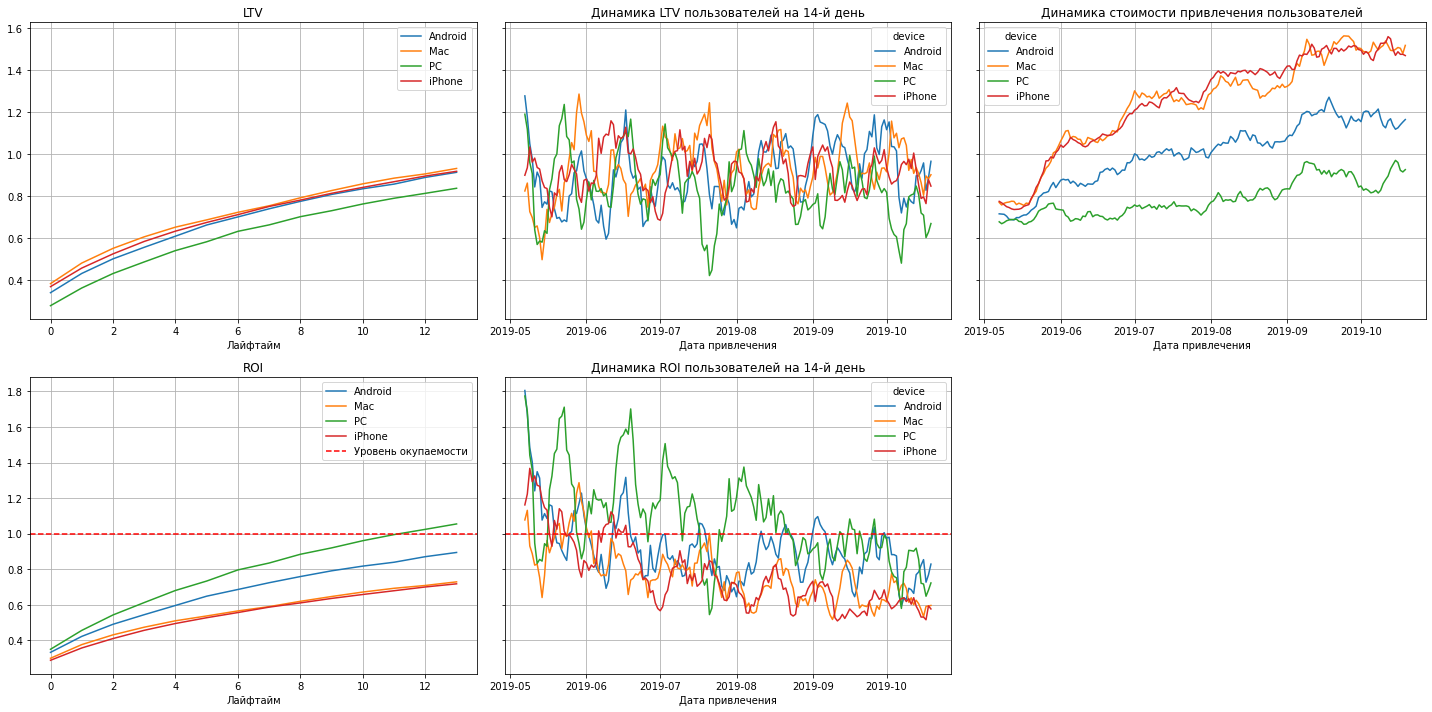

In [32]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

*По графикам видно:*
- *Реклама окупается только у пользователей PC*


- *Динамика затрат на привлечение пользователя возрастает у всех устройств, но в большей степени у пользователей Iphone и Mac, что может приводит к неокупаемости этих устройств*


- *Динамика ROI с течением времени падает у всех устройств, что может быть связано с другим признаком*

Рассчитаем и визуализируем удержание и конверсию пользователей по устройствам, используя функции `get_retention`, `plot_retention`, `get_conversion` и `plot_conversion`

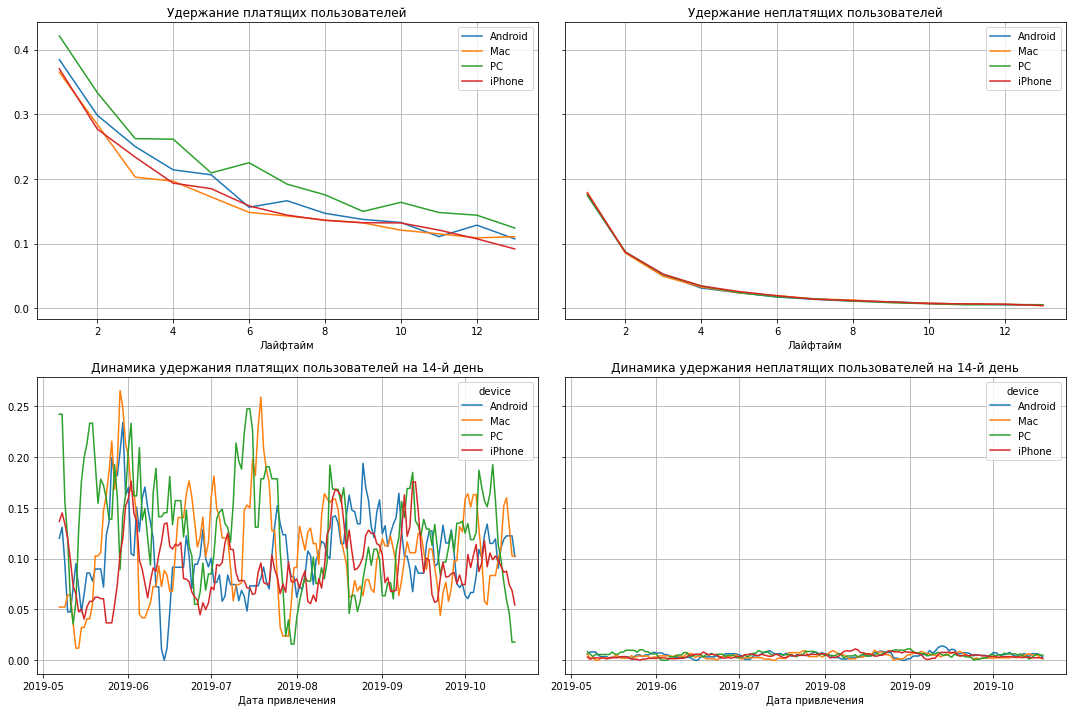

In [33]:
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, data_visits, observation_date, 
                                                                    horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_in_time, horizon_days)

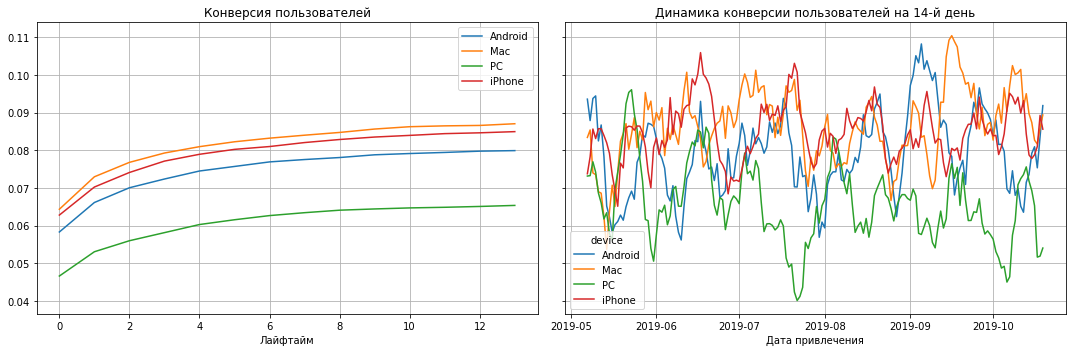

In [34]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, data_orders, observation_date, 
                                                                        horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, window=7)

*По данному расчету удержания и конверсии, можно сделать вывод, что пользователи PC окупаются за счет очень низкой стоимости траффика, потому что конверсия существенно ниже, чем на остальных устройствах, а удержание лишь немного больше. В целом вложение рекламных средств в PC выглядит достаточно привлекательно, тем не менее нужно помнить о том, что у этих пользователей наименьшая доля платящих клиентов. Интересно выглядят провалы в динамике конверсии у PC, потому что на них в основном приходится рост конверсии других устройств.*

## Расчет LTV, ROI и CAC по регионам

Посчитаем LTV, ROI и CAC по регионам.

In [35]:
dimensions = ['region']

In [36]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, 
                                                                               horizon_days,
                                                                               dimensions=dimensions
                                                                              )

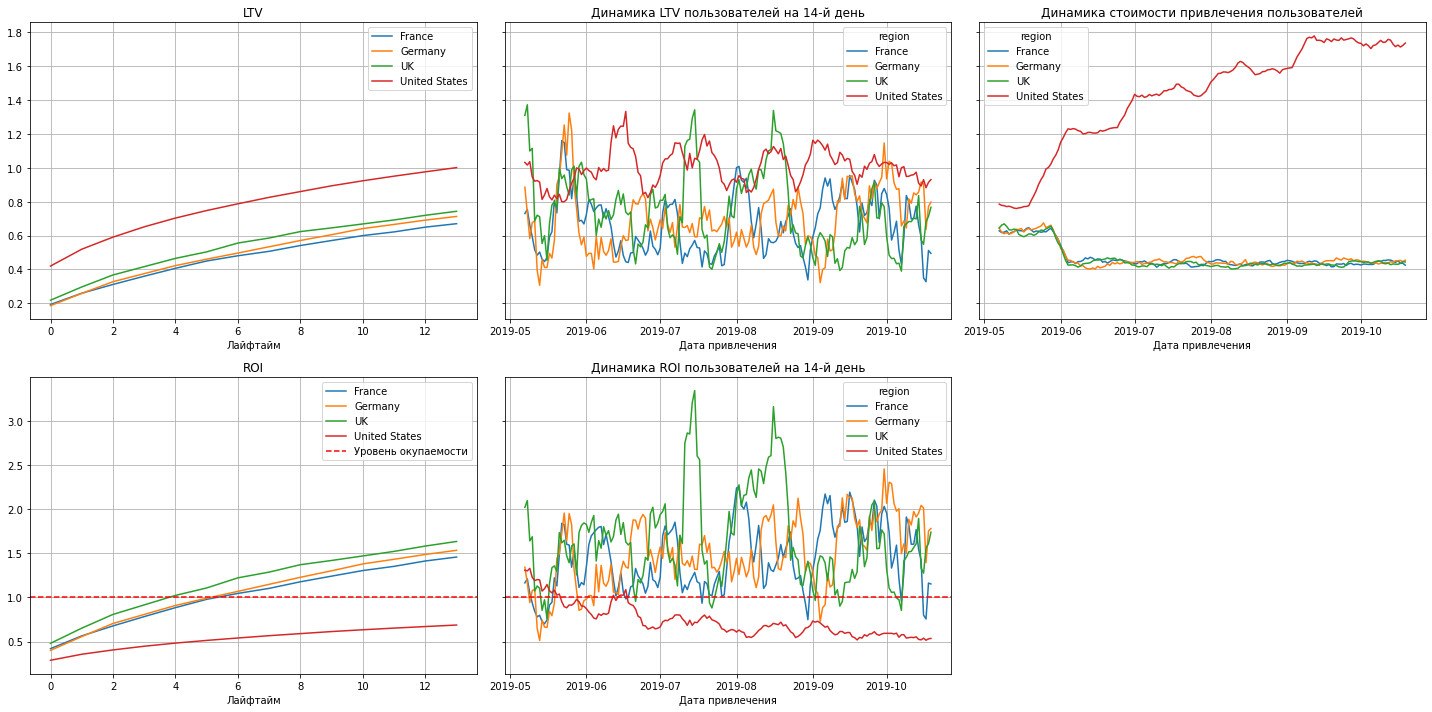

In [37]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

*Выводы по графикам:*
- *Реклама не окупается для пользователей из США.*


- *CAC стабилен у всех регионов за исключением США*


- *CAC в США резко увеличивается с середины мая и к горизонту анализа становится почти в 3 раза больше первоначального*

*Необходимо узнать причину: низкая конверсия или низкое удержание*

Рассчитаем и визуализируем удержание и конверсию пользователей по странам

In [38]:
dimensions = ['region']

retention_raw, retention_grouped, retention_in_time = get_retention(profiles, data_visits, observation_date, 
                                                                    horizon_days, dimensions=dimensions)

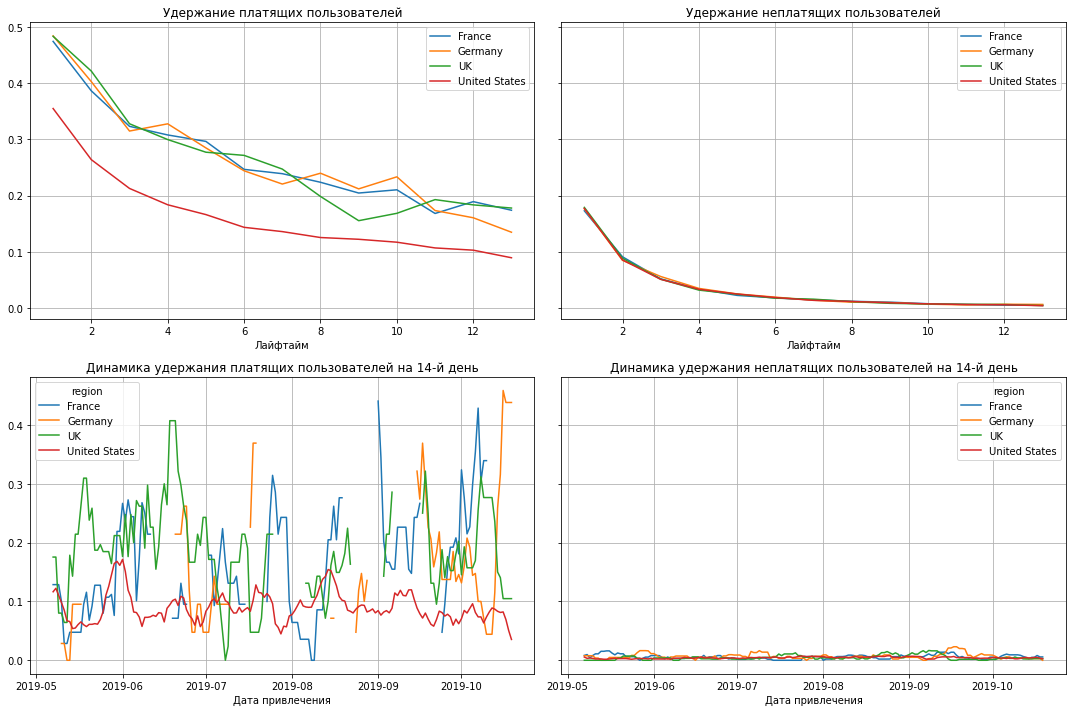

In [39]:
plot_retention(retention_grouped, retention_in_time, horizon_days)

In [40]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, data_orders, observation_date, 
                                                                        horizon_days, dimensions=dimensions)

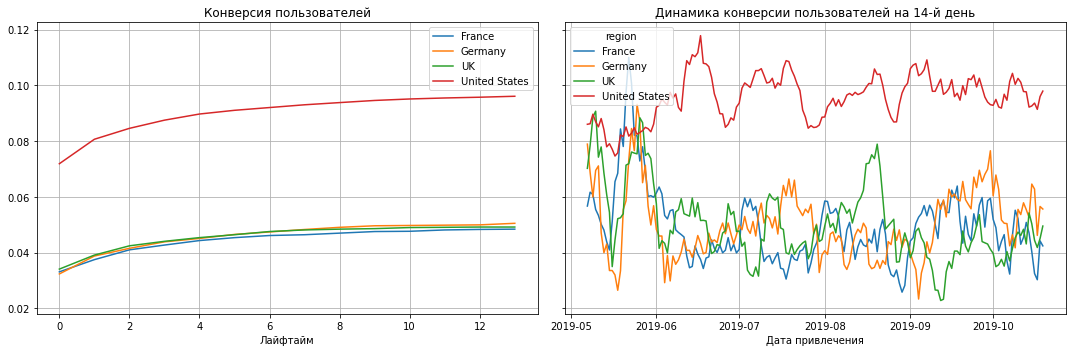

In [41]:
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, window=7)

***Конвертируются пользователи из США очень хорошо, а вот с удержанием явно проблема. Это может быть основной причиной неокупаемости рекламной кампании, так как значительная часть рекламного бюджета была потрачена именно на США. Возможно имеет место быть техническая ошибка.***

## Расчет LTV, ROI и CAC по каналам привлечения

Посчитаем LTV, ROI и CAC по каналам привлечения.

In [42]:
dimensions = ['channel']

In [43]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, 
                                                                               horizon_days,
                                                                               dimensions=dimensions
                                                                              )

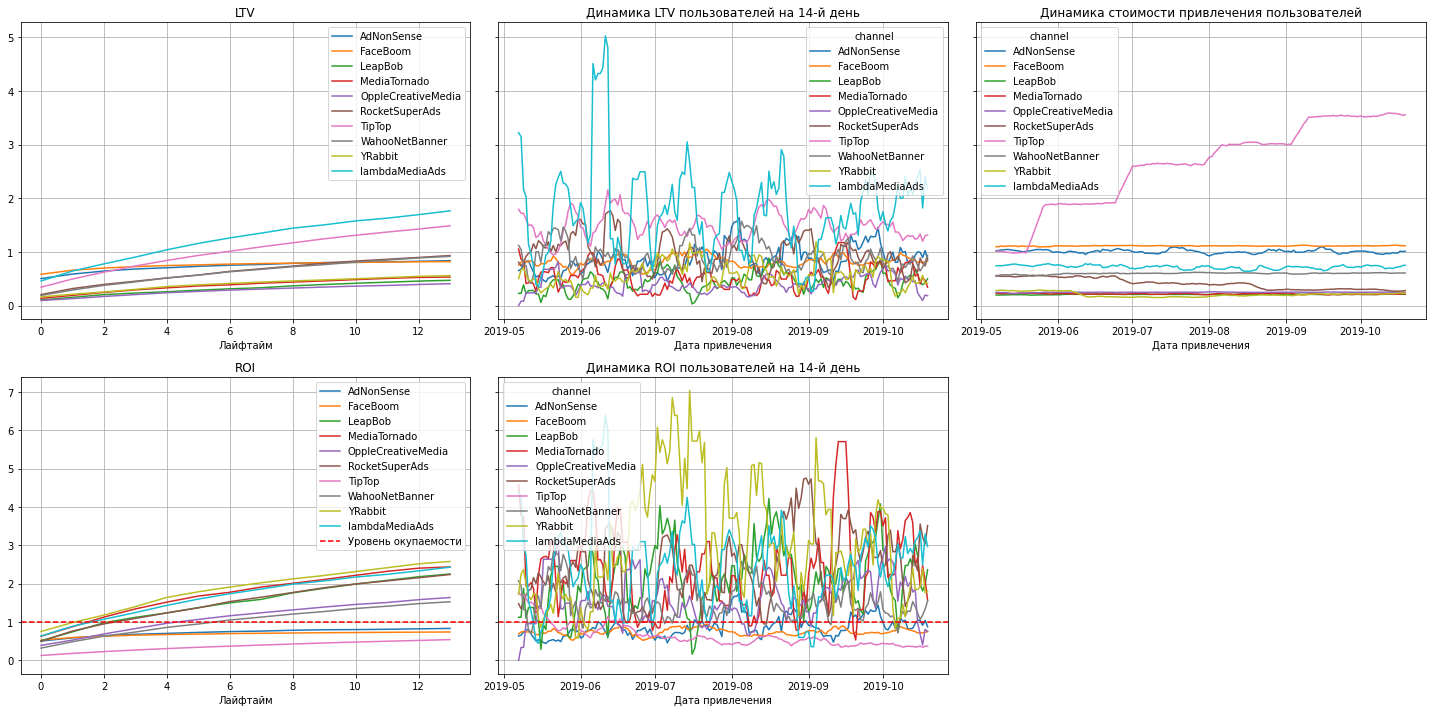

In [44]:
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

In [45]:
roi_grouped.sort_values(by=13)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
lambdaMediaAds,2056,0.727237,0.632899,0.887333,1.070887,1.245178,1.432136,1.595673,1.735841,1.859323,1.986818,2.070251,2.171709,2.241794,2.331922,2.428712
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519


*По графикам можно сделать такие выводы:*
- *Показатели ROI выглядят стабильно для большинства сетей, однако сети в которые было вложено больше всего рекламных средств, а именно 'FaceBoom', 'TipTop' и 'AdNonSense', рекламу не окупают*

- *Наблюдается довольно интенсивное повышение CAC на канале `TipTop`. При этом роста в динамики ROI с повышением CAC не происходит.*

Рассчитаем и визуализируем удержание и конверсию пользователей

In [46]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_in_time = get_retention(profiles, data_visits, observation_date, 
                                                                    horizon_days, dimensions=dimensions)

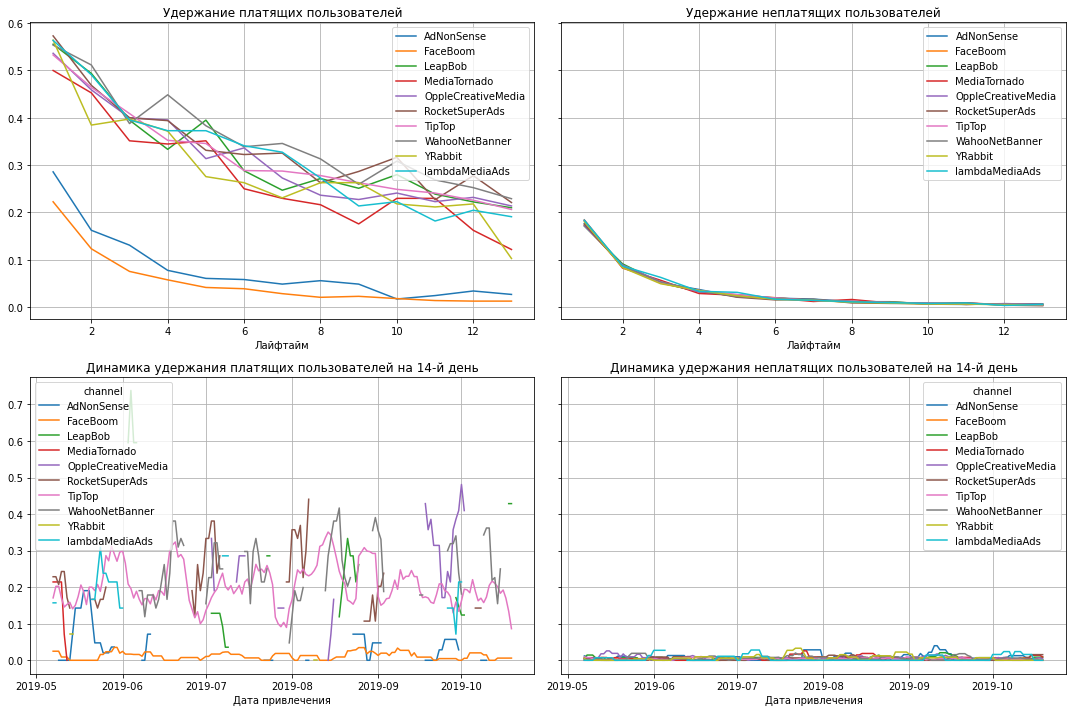

In [47]:
plot_retention(retention_grouped, retention_in_time, horizon_days)

In [48]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, data_orders, observation_date, 
                                                                        horizon_days, dimensions=dimensions)

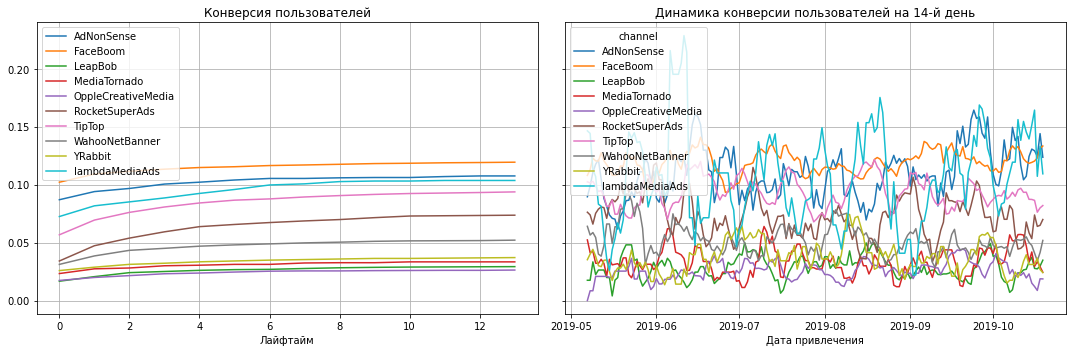

In [49]:
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, window=7)

In [50]:
retention_grouped.query('payer == True')

cohort_size    0         1         2         3  \
payer channel                                                              
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
True  AdNonSense          0.048426  0.016949  0.024213  0.033898  0.026634  
      FaceBoom            0.022606  0.017847  0.013682  0.012493  0.012493  
      LeapBob             0.251029  0.279835  0.238683  0.222222  0.209877  
      MediaTornado        0.175676  0.229730  0.229730  0.162162  0.121622  
      OppleCreativeMedia  0.227273  0.240909  0.222727  0.231818  0.213636  
      RocketSuperAds      0.286567  0.316418  0.226866  0.277612  0.220896  
      TipTop              0.262745  0.248739  0.240896  0.225770  0.206162  
      WahooNetBanner      0.259346  0.308411  0.268692  0.252336  0.228972  
      YRabbit             0.262821  0.217949  0.211538  0.217949  0.102564  
      lambdaMediaAds      0.213636  0.222727  0.181818  0.204545  0.190909

*С конверсией все в порядке, а на графике удержания пользователей видны крайне низкие показатели 'AdNonSense' и 'FaceBoom'*

***Вывод: по проведенной оценки окупаемости были определено следующее:***
- ***Реклама в целом не окупается. ROI в конце горизонта анализа доходит максимум до 80%***
- ***В большей степень негативное влияние на окупаемость рекламы вносят пользователи, привлеченные из США ввиду плохого удержания клиентов, что может быть связано с техническим сбоем или с низким качеством привлекаемых пользователей***
- ***Также низкое удержание пользователей наблюдается в рекламным сетях 'AdNonSense' и 'FaceBoom'***
- ***Пользователи пришедшие в приложение с устройств Iphone и Mac, Android не окупаются в отличие от пользователей PC, но это может быть связано с тем, что в США процент пользования этими устройствами существенно больше.***

***Необходимо отдельно изучить бизнес-показатели среди пользователей США.***

# Анализ пришедших пользователей по региону США

Для того, чтобы попытаться оптимизировать рекламную кампанию среди пользователей из США, построим графики LTV, ROI и CAC для конкретно этой выборки клиентов с разными признаками когорт.

In [51]:
profiles = profiles.query('channel != "organic" and region == "United States"')

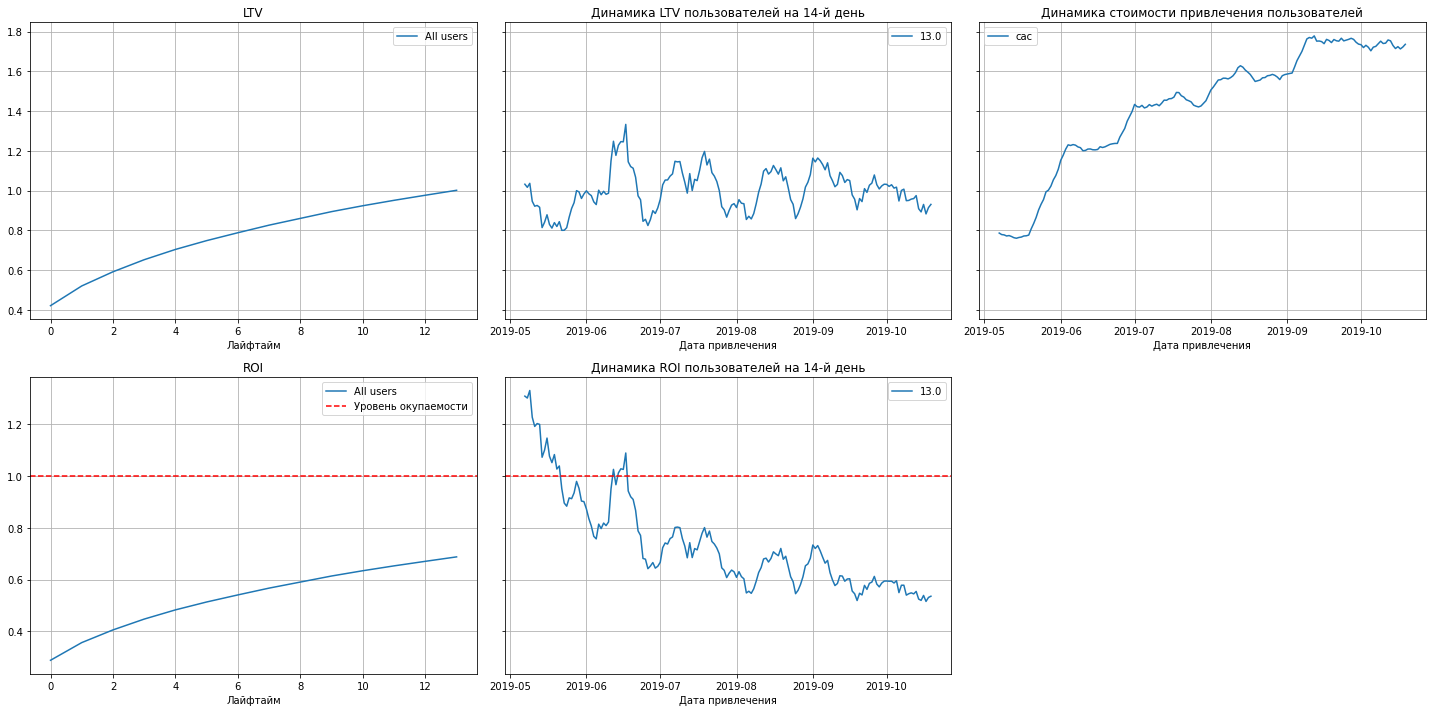

In [52]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, horizon_days)
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

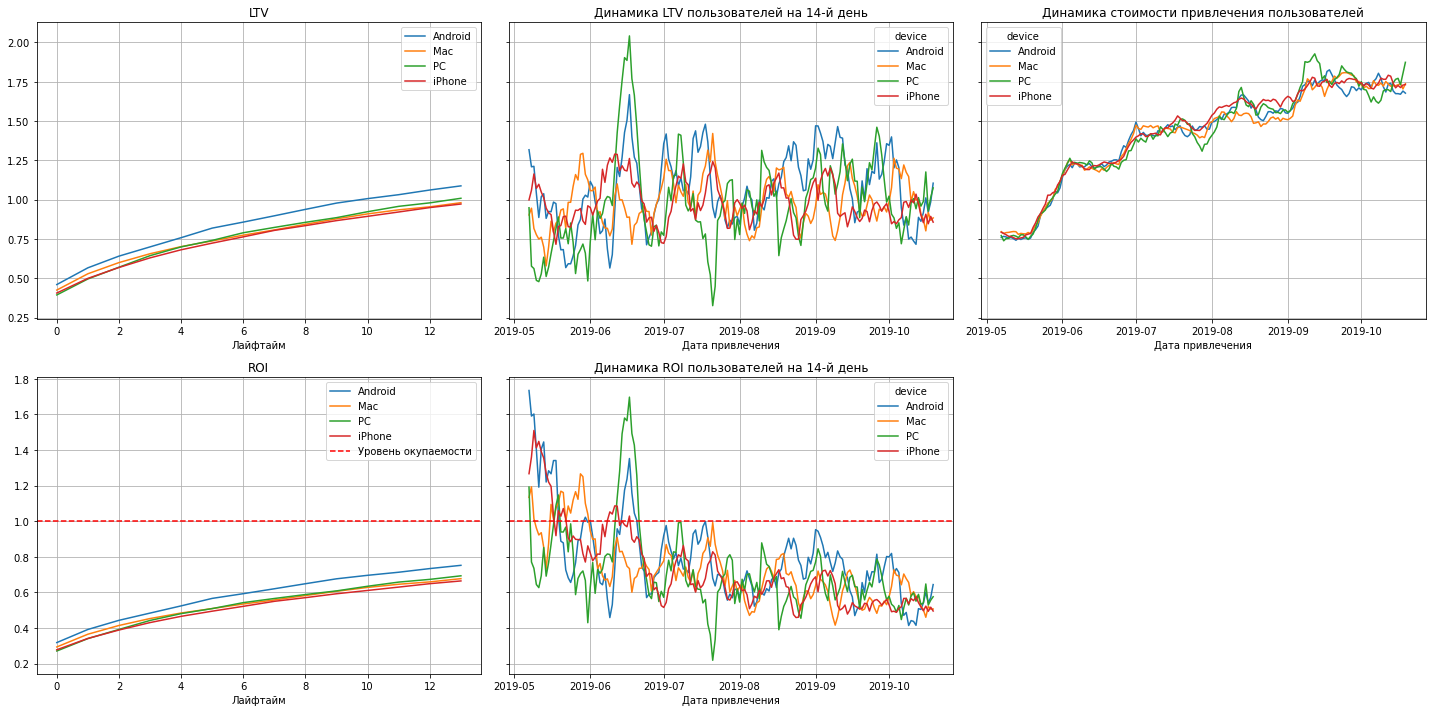

In [53]:
dimensions = ['device']
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, 
                                                                               horizon_days,
                                                                               dimensions=dimensions
                                                                              )
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

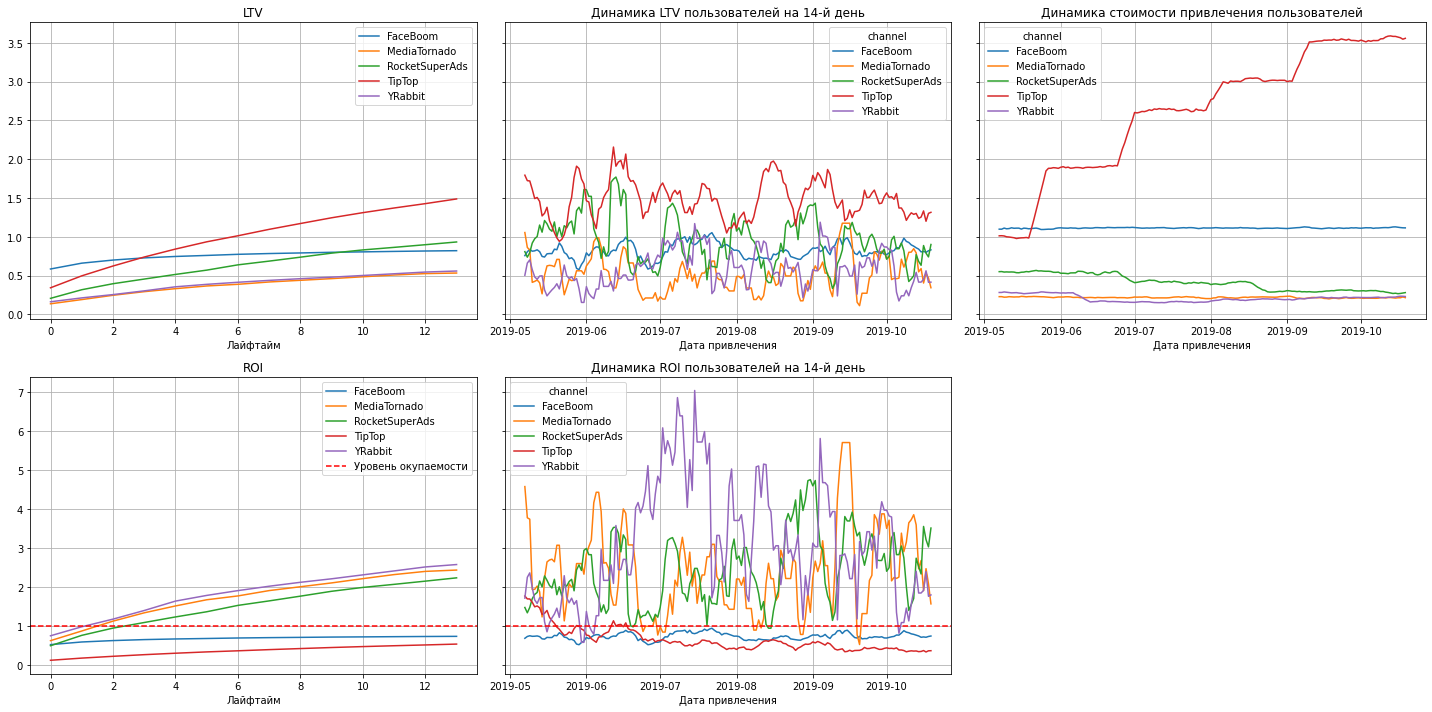

In [54]:
dimensions = ['channel']
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, 
                                                                               horizon_days,
                                                                               dimensions=dimensions
                                                                              )
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

*По графикам становится очевидно, что основные потери в эффективности рекламы приходятся на пользователей TipTop и Faceboom, проверим так ли это, исключив этих пользователей из анализа.*

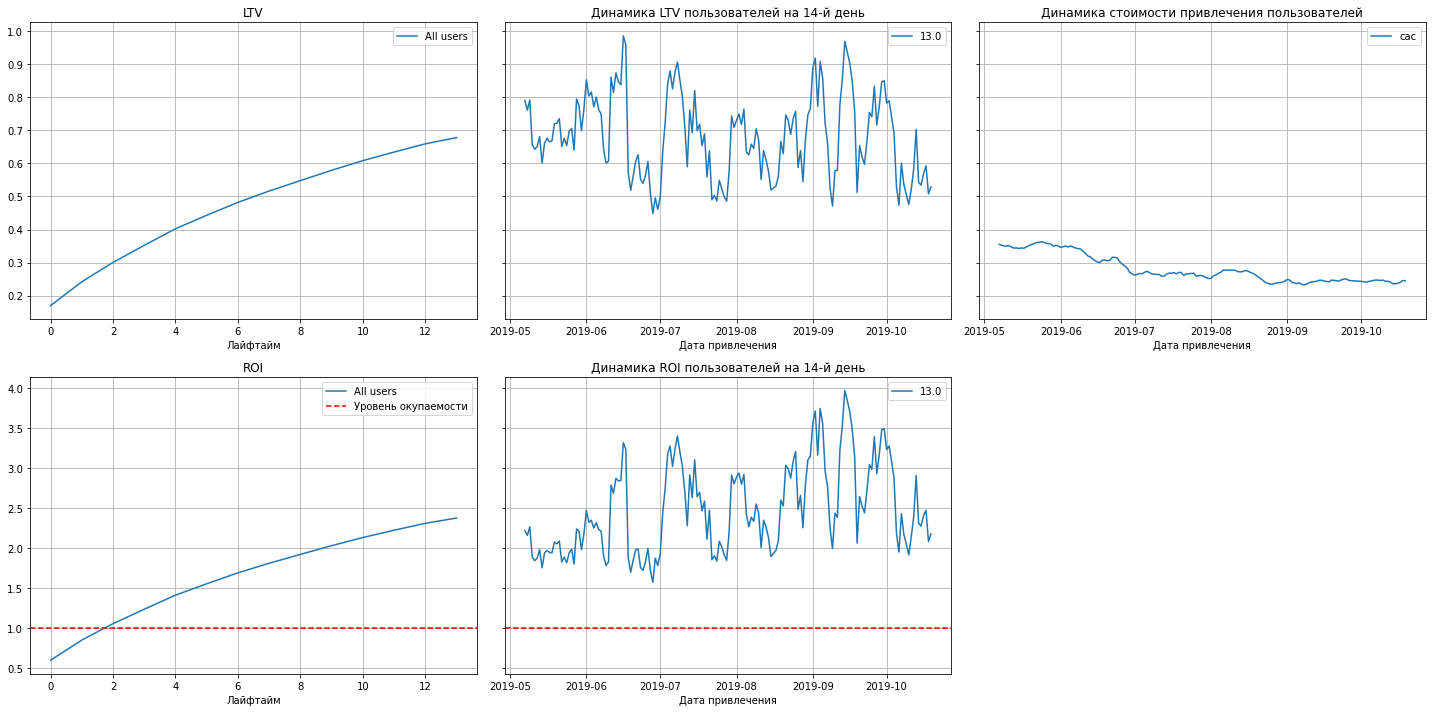

In [55]:
profiles = profiles.query('channel != "organic" and region == "United States" and channel !="TipTop" and channel !="FaceBoom"')
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(profiles, data_orders, observation_date, horizon_days)
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

***Действительно, без этих площадок, реклама начинает оккупаться. Значит нужно, либо найти причину неэффективности рекламы на этих каналах, либо переориентировать затраты, на другие каналы, при условии, что доля платящих клиентов у них будет на уровне Faceboom и TipTop. Под этими критериями можно попробовать вложить средства в канал RocketSuperAds. Доля платящих клиентов этого канала максимально приближена к Faceboom и TipTop.***

# Выводы

**По итогам результатам работы были проделаны следующие шаги по проекту:**
- ***обработан файл с данным о визитах, заказах и рекламных расходах на привлечение пользователей в приложение 'Procrastinate Pro+': проверено наличие пропусков и дубликатов, изменены типы данных и т.д.***
- ***определены страны, устройства и рекламные сети с наибольшей долей платящих пользователей*** 
- ***посчитана общая сумма расходов на маркетинг***
- ***выяснено, как траты распределены по рекламным источникам, и какая средняя стоимость привлечения пользователя***
- ***определена окупаемость рекламы в целом***
- ***выявлены устройства, страны и рекламные каналы, которые могут оказывать негативное влияние на окупаемость рекламы***

**По итогам проделанного исследовательского анализа удалось установить следующее:**
- ***наиболее платящими являются пользователи из США, заходящие с Iphone из рекламной сети FaceBoom***
- ***на рекламную кампанию было потрачено 105497 долларов, а основные средства идут на рекламные сети FaceBoom и TipTop*** 
- ***в большей степень негативное влияние на окупаемость рекламы вносят пользователи, привлеченные из США ввиду плохого удержания клиентов, что может быть связано с техническим сбоем или неэффективным рекламным кампаниям по каналам TipTop и FaceBoom***
- ***низкое удержание пользователей наблюдается в рекламным сетях 'AdNonSense' и 'FaceBoom'***
- ***Наблюдается довольно интенсивное повышение CAC на канале TipTop, примерно в 2,5 раза. При этом роста в динамики ROI с повышением CAC не происходит.***
- ***пользователи пришедшие в приложение с устройств Iphone и Mac не окупаются в отличие от пользователей Android и PC, но это может быть связано с тем, что в США процент пользования этими устройствами существенно больше.***

**Рекомендации отделу маркетинга:**
- ***Перераспределить рекламные средства на страны Европы и Великобритании, по причине того, что кампании, которые проводятся в этих регионах, на данный момент полностью себя окупают***
- ***Пересмотреть расходы в регионе США на такие каналы привлечения, как TipTop и FaceBoom. Возможно имеет место быть технический сбой или некачественный траффик. Попробовать направить средства на рекламный источник RocketSuperAds, у которого доля платящих клиентов этого канала приближена к Faceboom и TipTop.*** 

<br> **Полученные результаты позволяют пересмотреть текущую реализацию рекламной кампании, указывают потенциальные места технических сбоев и помогают лучшим образом спланировать рекламную кампанию на следующий период**